In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-frozenlava/Transaction_details.csv
/kaggle/input/data-frozenlava/Customers_data.csv


In [2]:
df=pd.read_csv("/kaggle/input/data-frozenlava/Customers_data.csv")

In [3]:
df=df.drop("Unnamed: 0",axis=1)

In [4]:
df

,ID,Age,Gender
0,C5841053,22,F
1,C2142763,59,M
2,C4417068,20,F
3,C9031234,28,F
4,C1536588,44,F
...,...,...,...
714261,C5028150,36,M
714262,C1034220,24,M
714263,C8020229,26,M
714264,C6459278,24,M


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
#F=0, M=1

In [6]:
df

,ID,Age,Gender
0,C5841053,22,0
1,C2142763,59,1
2,C4417068,20,0
3,C9031234,28,0
4,C1536588,44,0
...,...,...,...
714261,C5028150,36,1
714262,C1034220,24,1
714263,C8020229,26,1
714264,C6459278,24,1


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

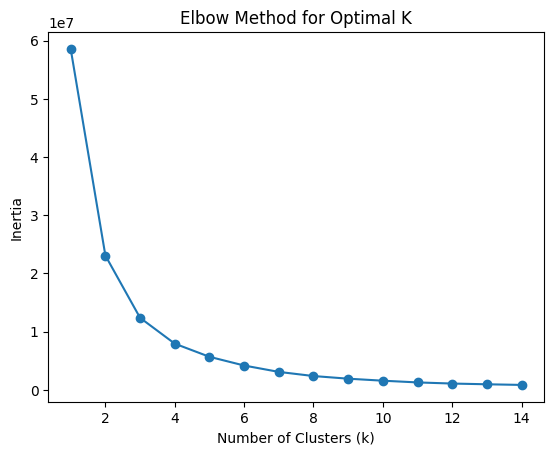

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

k_values = range(1, 15)

inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Age', 'Gender']])
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [8]:
import pandas as pd
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['Age', 'Gender']])

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
df=df.drop("Age",axis=1)
df=df.drop("Gender",axis=1)

In [10]:
df

,ID,cluster
0,C5841053,1
1,C2142763,2
2,C4417068,1
3,C9031234,1
4,C1536588,3
...,...,...
714261,C5028150,0
714262,C1034220,1
714263,C8020229,1
714264,C6459278,1


In [11]:
df.to_csv("Customer_cluster.csv")